In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
df_diabetes = pd.read_csv('C:/python/diabetes.csv')

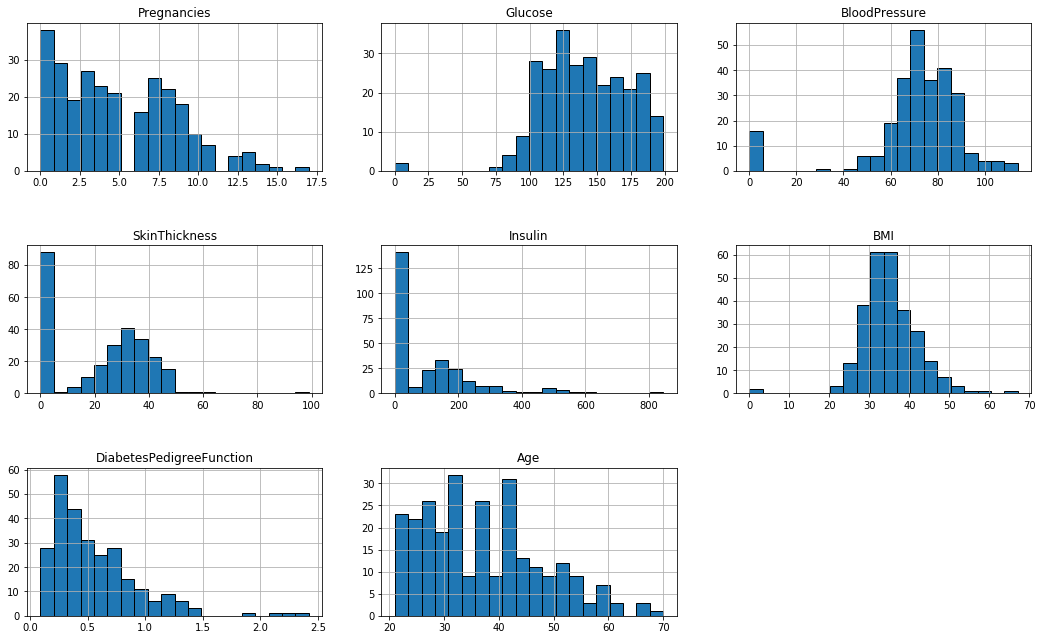

In [44]:
df_diabetes1=df_diabetes[df_diabetes['Outcome']==1]
columns=df_diabetes.columns[:8]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    df_diabetes1[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [25]:
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [26]:
X, y = df_diabetes.iloc[:, :8].values, df_diabetes.iloc[:, 8].values

In [27]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3,
                    stratify=y,
                    random_state=0)
X_train, X_train_val, y_train, y_train_val = \
    train_test_split(X, y, test_size=0.3,
                    stratify=y,
                    random_state=0)

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_train_val_std = sc.transform(X_train_val)
X_test_std = sc.transform(X_test)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [30]:
rnd_clf = RandomForestClassifier(n_estimators=200, random_state=42)
extra_trees_clf = ExtraTreesClassifier(n_estimators=200, random_state=42)
mlp_clf = MLPClassifier(random_state=42)
svm_clf = SVC(gamma="auto", random_state=42)
log_clf = LogisticRegression(solver="liblinear", random_state=42)
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('extra', extra_trees_clf)],
    voting='hard')

In [31]:
voting_clf.fit(X_train_std, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gin...
                                        

In [32]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)

In [33]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, mlp_clf, extra_trees_clf, voting_clf, bag_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.7878787878787878
RandomForestClassifier 0.8008658008658008
SVC 0.6493506493506493
MLPClassifier 0.670995670995671
ExtraTreesClassifier 0.7878787878787878
VotingClassifier 0.7965367965367965
BaggingClassifier 0.7748917748917749


In [34]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)

# Is PCR useful?

In [35]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[2.04241039 1.71892202 1.07478574 0.42789489 0.43955938 0.68393485
 0.78361637 0.84380173]


In [36]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [37]:
cum_var_exp

array([0.25482588, 0.46929101, 0.60338904, 0.70866784, 0.80643748,
       0.89177014, 0.94661274, 1.        ])

### It seems useless

# We have to make a cross-validation model and hyperparameter tuning model.

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
rnd_clf.fit(X_train, y_train)
y_pred = rnd_clf.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)
print(classification_report(y_test,y_pred))
print("dd", accuracy_score(y_test, y_pred))

[[131  19]
 [ 27  54]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       150
           1       0.74      0.67      0.70        81

    accuracy                           0.80       231
   macro avg       0.78      0.77      0.78       231
weighted avg       0.80      0.80      0.80       231

dd 0.8008658008658008


Confusion matrix, recall